# Задача 5

Провести интерполяционный полином $P_n(x)$ через точки 

$$ x_k = 1 + \frac{k}{n}, y_k = \ln{x_k}, k = 0, ....,n. $$

при $n = 4, ..., 15$. Нарисовать графики  $P_n(x) - \ln{x}$

In [1]:
n_min = 4
n_max = 60

In [2]:
import math

Задаем функцию, которую будем аппроксимировать.

In [3]:
def func(x):
    return math.log(x)

Задаем функции для вычисления точек.

In [4]:
def x_k(k, n):
    return 1 + k/n

def y_k(k, n):
    return func(x_k(k, n))

### 1. Полиномы Лагранжа

$$l_i(x) = \prod_{0 \leq j \leq n, j \neq i}{(x-x_j)}$$

$$ P_n(x) = \sum_{i = 0}^{n}{y(x_i) \cdot \frac{l_i(x)}{l_i(x_i)}} $$

Время вычисления $P_n(x)$ для одного $x$: $\approx \mathcal{O}(n_2)$

Определю функции для вычисления полиномов Лагранжа:

In [5]:
def l_i(i, x, n):
    l = 1
    for k in range(n+1):
        if(k != i):
            l = l*(x - x_k(k, n))
    return l

In [6]:
def P_lagrange(x, n):
    pol = 0.
    for i in range(n+1):
        pol += y_k(i, n)*l_i(i, x, n) / l_i(i, x_k(i, n), n)
    return pol

Для каждого n беру шаг $h = \frac{x_n - x_0}{20}$ и вычисляю полином Лагранжа в точках $x_i = x_0 + h*i$ для $i = 1...20$ при том, что для всех $n$ $x_0 = 1$. (А $x_n = 2$).

В общем, шаг $h = \frac{1}{20}$

Сохраняю для каждого $n = 4...15$ все $x_i$ и соответствующие им ошибки $P_n(x_i) - \ln{x_i}$. 

In [7]:
res_n_lagrange = dict()
for n in range(n_min, n_max+1):
    err_x = []
    err_val = []
    h = 1/20
    for i in range(1, 21):
        x = 1 + h*i
        err_x.append(x)
        err = abs(P_lagrange(x, n) - func(x))
        err_val.append(err)
    res_n_lagrange[n] = [err_x, err_val]  

Проверка в точках $x_k = 1 + \frac{k}{n}$:

In [8]:
res_n_lagrange_k = dict()
for n in range(n_min, n_max+1):
    err_x = []
    err_val = []
    for k in range(n+1):
        x = x_k(k, n)
        err_x.append(x)
        err = abs(P_lagrange(x, n) - func(x))
        err_val.append(err)
    res_n_lagrange_k[n] = [err_x, err_val]        

### 2. Полиномы Ньютона

$$P(x) = P(x_0) + \sum_{k=1}^{n}P(x_0, x_1, ..., x_k)\prod_{j=0}^{k-1}(x - x_j)$$

Разделенные разности для полиномов $P(x_0, x_1, ..., x_k)$ совпадают с разделенными разностями для интерполируемой функции $y(x)$ поскольку $P(x_i) = y(x_i)$. Следовательно интерполяционный полином: 

$$P(x) = y(x_0) + \sum_{k=1}^{n}y(x_0, x_1, ..., x_k)\prod_{j=0}^{k-1}(x - x_j)$$

A разделенная разность представима в виде 

$$y(x_0, x_1, ...., x_k) = \sum_{i=0}^{k}{\frac{y(x_i)}{\prod_{j\neq i}{(x_i - x_j)}}}$$

Определю метод для вычисления разделенных сумм и заранее "заготовлю" все необходимые разделенные суммы для вычисления полиномов Ньютона для заданных $n$.

Определю функцию для вычисления полиномов Ньютона:

In [9]:
def P_newton(x, n):
    a = []
    for i in range(0, n+1):
        a.append(y_k(i, n))
        for j in range(0, i):
            a[i] = (a[i] - a[j]) / (x_k(i, n) - x_k(j, n))
    res = a[n]
    for i in range(n-1, -1, -1):
        res = res * (x - x_k(i, n)) + a[i]
    return res

Вычисляю полином в точках $x_i = x_0 + h*i$ для $i = 1...20$ при том, что для всех $n$ $x_0 = 1$. (А $x_n = 2$).

Шаг $h = \frac{1}{20}$

Сохраняю для каждого $n = 4...15$ все $x_i$ и соответствующие им ошибки $P_n(x_i) - \ln{x_i}$. 

In [10]:
res_n_newton = dict()
for n in range(n_min, n_max+1):
    err_x = []
    err_val = []
    h = 1/20
    for i in range(1, 21):
        x = 1 + h*i
        err_x.append(x)
        err = abs(P_newton(x, n) - func(x))
        err_val.append(err)
    res_n_newton[n] = [err_x, err_val]        

Проверка в точках $x_k = 1 + \frac{k}{n}$:

In [11]:
res_n_newton_k = dict()
for n in range(n_min, n_max+1):
    err_x = []
    err_val = []
    h = 2/20
    for k in range(n+1):
        x = x_k(k, n)
        err_x.append(x)
        err = abs(P_newton(x, n) - func(x))
        err_val.append(err)
    res_n_newton_k[n] = [err_x, err_val]   

### 3. Графики

In [12]:
import matplotlib.pyplot as plt

##### Зависимость ошибки $P(x) - ln(x)$ от $x$ для обоих полиномов при $n = 15$

*В точках $x_i \neq x_k$*

n =  50


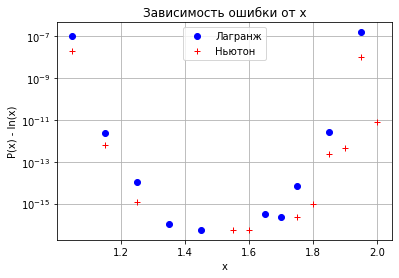

In [13]:
n = n_max - 10
print('n = ', n)
plt.plot(res_n_lagrange[n][0][0:], res_n_lagrange[n][1][0:], 'bo', label = 'Лагранж')
plt.plot(res_n_newton[n][0][0:], res_n_newton[n][1][0:], 'r+', label = 'Ньютон')
plt.grid()
plt.xlabel('x')
plt.ylabel('P(x) - ln(x)')
plt.title('Зависимость ошибки от x')
plt.legend()
plt.yscale("log")
plt.show()

*В точках $x_k = 1 + \frac{k}{n}$:*

n =  50


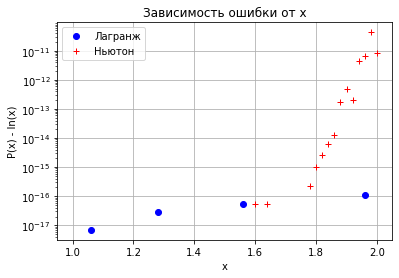

In [14]:
n = n_max - 10
print('n = ', n)
plt.plot(res_n_lagrange_k[n][0][0:], res_n_lagrange_k[n][1][0:], 'bo', label = 'Лагранж')
plt.plot(res_n_newton_k[n][0][0:], res_n_newton_k[n][1][0:], 'r+', label = 'Ньютон')
plt.grid()
plt.xlabel('x')
plt.ylabel('P(x) - ln(x)')
plt.title('Зависимость ошибки от x')
plt.legend()
plt.yscale("log")
plt.show()

##### Зависимость средней ошибки $P(x) - ln(x)$ от $n$ для обоих полиномов

*В точках $x_i \neq x_k$*

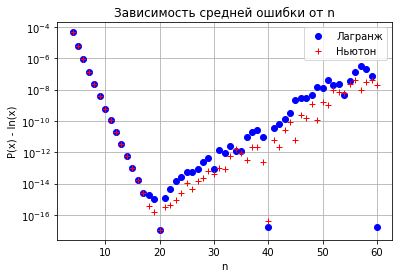

In [15]:
n = n_max - 10
plt.plot([n for n in range(n_min, n_max+1)], [sum(res_n_lagrange[n][1])/len(res_n_lagrange[n][1]) for n in range(n_min, n_max+1)], 'bo', label = 'Лагранж')
plt.plot([n for n in range(n_min, n_max+1)], [sum(res_n_newton[n][1])/len(res_n_newton[n][1]) for n in range(n_min, n_max+1)], 'r+', label = 'Ньютон')
plt.grid()
plt.xlabel('n')
plt.ylabel('P(x) - ln(x)')
plt.title('Зависимость средней ошибки от n')
plt.yscale("log")
plt.legend()
plt.show()

*В точках $x_k = 1 + \frac{k}{n}$:*

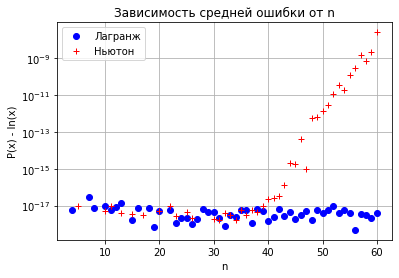

In [16]:
plt.plot([n for n in range(n_min, n_max+1)], [sum(res_n_lagrange_k[n][1])/len(res_n_lagrange_k[n][1]) for n in range(n_min, n_max+1)], 'bo', label = 'Лагранж')
plt.plot([n for n in range(n_min, n_max+1)], [sum(res_n_newton_k[n][1])/len(res_n_newton_k[n][1]) for n in range(n_min, n_max+1)], 'r+', label = 'Ньютон')
plt.grid()
plt.xlabel('n')
plt.ylabel('P(x) - ln(x)')
plt.title('Зависимость средней ошибки от n')
plt.yscale("log")
plt.legend()
plt.show()